In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Loading data into numpy arrays
inp_paras = np.load('data/inp_paras_995.npy')
aoas_opt = np.load('data/aoas_opt_995.npy')
airfoils_opt = np.load('data/airfoils_opt_995.npy')

# Train Dataset - Inverse Design Parameters (Mach Number, Reynolds Number, Target Lift Coeffecient)
#print(inp_paras)
print(inp_paras.shape)

# Train Dataset - optimal angle of attacks
#print(aoas_opt)
print(aoas_opt.shape)

# Testing Dataset ?
#print(airfoils_opt)
print(airfoils_opt.shape)

[[5.0000000e-01 1.9037683e+07 1.0300000e+00]
 [2.8000000e-01 8.9729841e+07 1.3800000e+00]
 [2.9000000e-01 6.1590231e+07 1.1800000e+00]
 ...
 [4.9000000e-01 7.1172774e+07 1.2100000e+00]
 [3.5000000e-01 5.6085562e+07 9.1000000e-01]
 [3.3000000e-01 5.2319263e+07 9.2000000e-01]]
(995, 3)


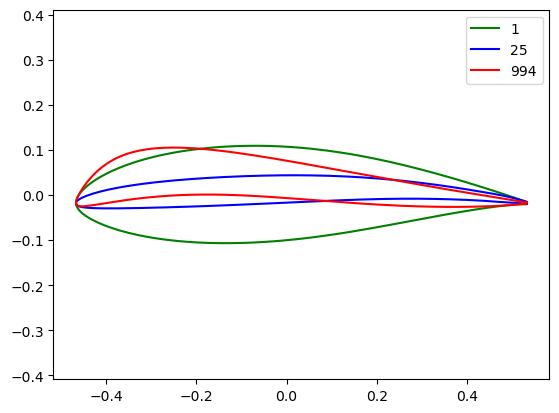

In [77]:
%matplotlib inline
# Centering the airfoils
airfoils_opt[:, :, 0] -= airfoils_opt[:, :, 0].mean()
airfoils_opt[:, :, 1] -= airfoils_opt[:, :, 1].mean()

# Plotting testing airfoils
airfoil_id = 1
plt.plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='green')

airfoil_id = 25
plt.plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='blue')

airfoil_id = 994
plt.plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='red')
plt.axis('equal')
plt.legend()
plt.show()


In [ ]:
# Creating dataframe design parameters
df = pd.DataFrame(inp_paras,columns=['Target Lift Coeffecient','Reynolds Number', 'Mach Number'])
df['Angle of Attack'] = aoas_opt
df.tail()

,Target Lift Coeffecient,Reynolds Number,Mach Number,Angle of Attack
990,0.57,13197858.0,1.09,2.956100
991,0.30,61337098.0,1.34,8.220654
992,0.49,71172774.0,1.21,4.472123
993,0.35,56085562.0,0.91,3.243273
994,0.33,52319263.0,0.92,4.790037


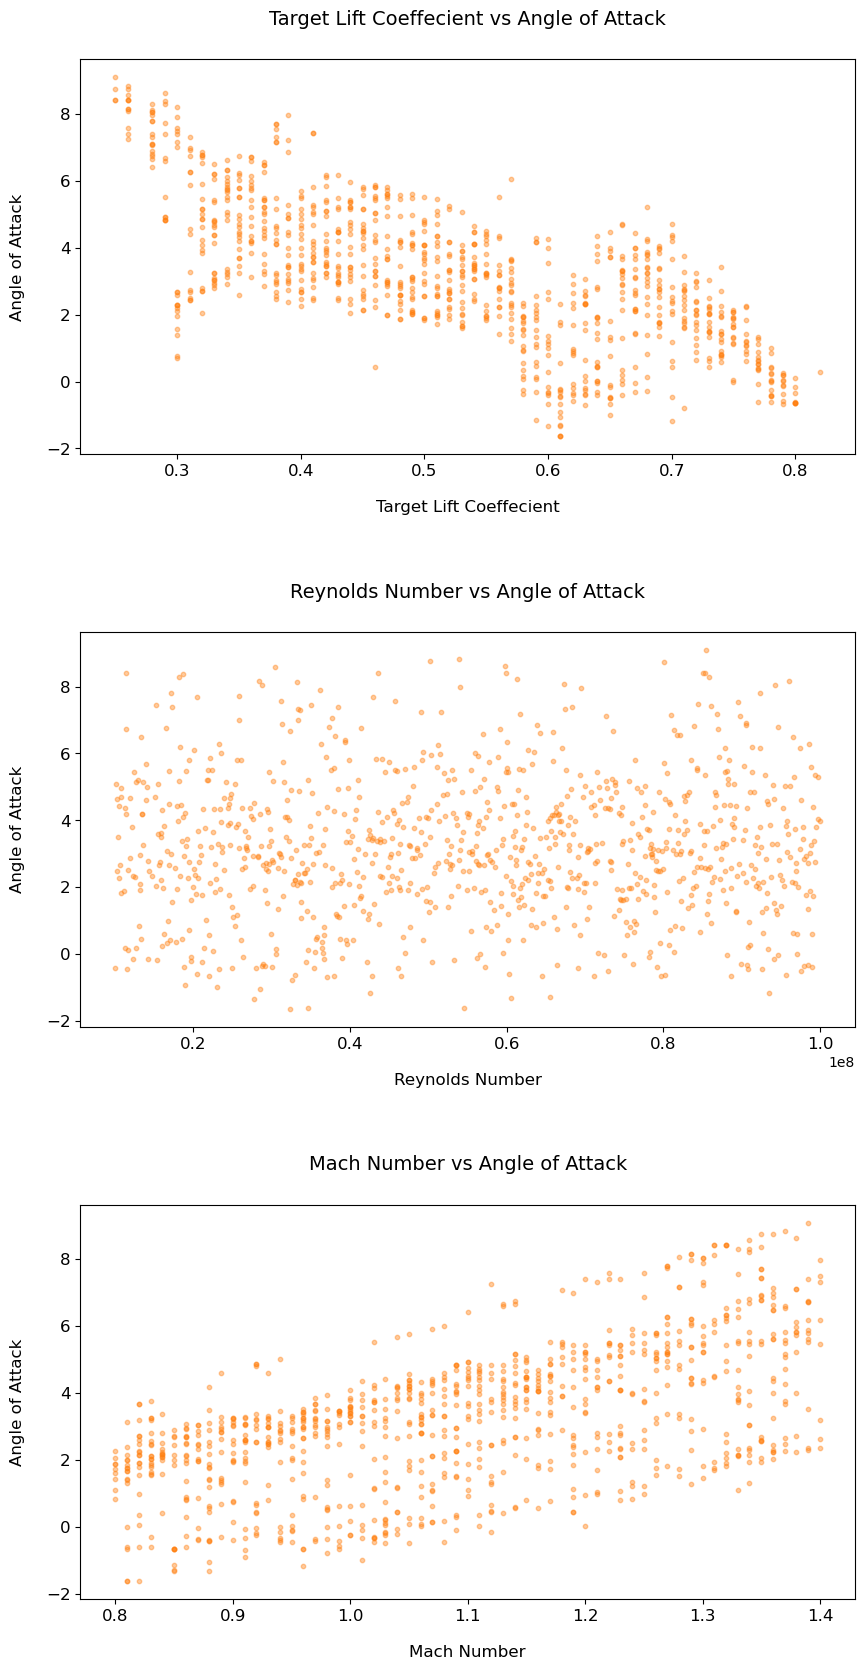

In [ ]:
# Plotting design parameters against airfoil angle of attacks
fig, axs = plt.subplots(3,1,figsize=(10, 20))
column_names = df.columns.tolist()
axes_flat = axs.flatten()

for i,ax in enumerate(axes_flat):
    ax.scatter(df[column_names[i]], df[column_names[-1]], s=10,alpha=0.4,c='tab:orange')
    ax.set_xlabel(f"{column_names[i]}", fontsize = 12,labelpad =15)
    ax.set_ylabel(f"{column_names[-1]}", fontsize = 12, labelpad =15)
    ax.set_title(f"{column_names[i]} vs {column_names[-1]}",fontsize = 14,pad = 25)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    #ax.spines["top"].set_visible(False)
    #ax.spines["right"].set_visible(False)

fig.subplots_adjust(hspace=.45)
plt.show()

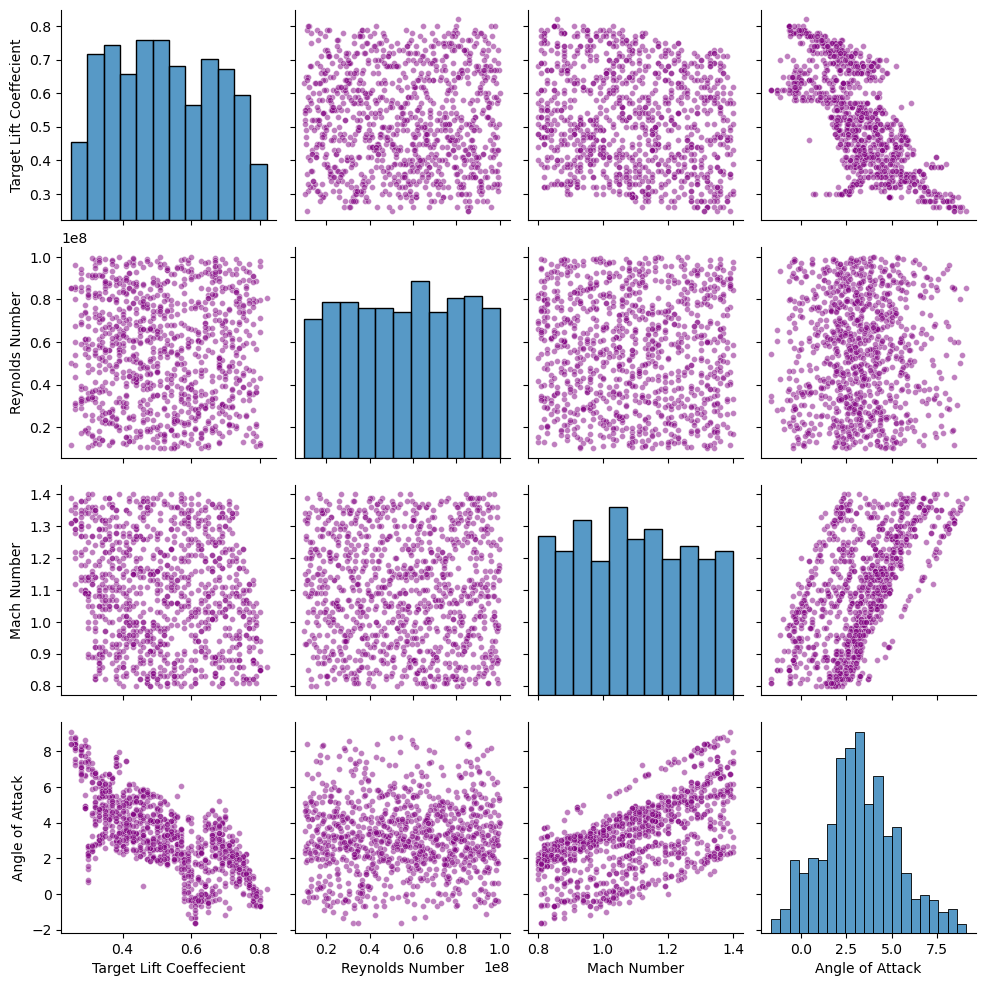

In [ ]:
# Plotting scatter grid plot of all variables
sns.pairplot(df, plot_kws=dict(marker="o",s=18,alpha=0.5,linewidth=0.4,color='purple'))
plt.show()